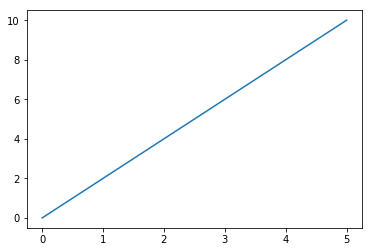

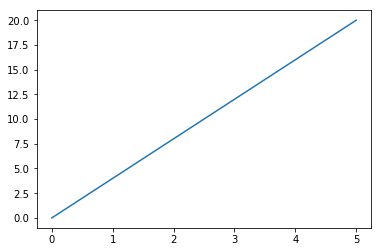

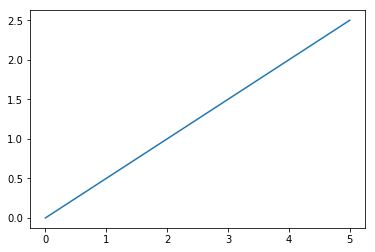

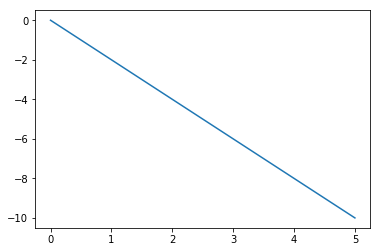

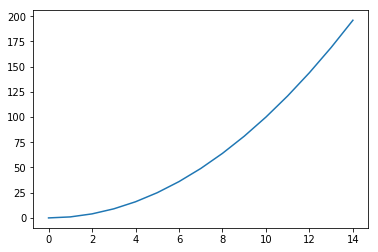

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.asarray([0, 1, 2, 3, 4, 5])
# Let's set the slope of the line to 2.
y = 2 * x

# See how this line is "steeper" than before?  The larger the slope is, the steeper the line becomes.
# On the flipside, fractional slopes will create a "shallower" line.
# Negative slopes will create a line where y values decrease as x values increase.
plt.plot(x, y)
plt.show()

x = np.asarray([0, 1, 2, 3, 4, 5])
y = 4 * x
plt.plot(x, y)
plt.show()

x = np.asarray([0, 1, 2, 3, 4, 5])
y = .5 * x
plt.plot(x, y)
plt.show()

x = np.asarray([0, 1, 2, 3, 4, 5])
y = -2 * x
plt.plot(x, y)
plt.show()

x = np.asarray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14])
y = x * x
plt.plot(x, y)
plt.show()

In [5]:
import pandas as pd
wine_quality = pd.read_csv('wine_quality_white.csv')

In [10]:
# The wine quality data is loaded into wine_quality
from numpy import cov

cov_density = cov(wine_quality['density'],wine_quality['quality'])[0,1]
cov_density

slope_density = cov_density/(wine_quality['density'].std() ** 2)
slope_density

-90.942399942137826

In [12]:
from numpy import cov

# This function will take in two columns of data, and return the slope of the linear regression line.
def calc_slope(x, y):
  return cov(x, y)[0, 1] / x.var()

density_slope = calc_slope(wine_quality['density'], wine_quality['quality'])

intercept_density = wine_quality['quality'].mean() - (density_slope * wine_quality['density'].mean())

intercept_density

96.277144576050816

In [13]:
from numpy import cov

def calc_slope(x, y):
  return cov(x, y)[0, 1] / x.var()

# Calculate the intercept given the x column, y column, and the slope
def calc_intercept(x, y, slope):
  return y.mean() - (slope * x.mean())

density_slope = calc_slope(wine_quality['density'], wine_quality['quality'])

density_intercept = calc_intercept(wine_quality['density'], wine_quality['quality'], density_slope)

def predict_density(value):
    return (density_slope * value) + density_intercept

predicted_quality = wine_quality['density'].apply(predict_density)

predicted_quality.head(5)

0    5.243802
1    5.880399
2    5.780362
3    5.734891
4    5.734891
Name: density, dtype: float64

In [14]:
from scipy.stats import linregress

# We've seen the r_value before -- we'll get to what p_value and stderr_slope are soon -- for now, don't worry about them.
slope, intercept, r_value, p_value, stderr_slope = linregress(wine_quality["density"], wine_quality["quality"])

# As you can see, these are the same values we calculated (except for slight rounding differences)
print(slope)
print(intercept)

predicted_quality = (slope  * wine_quality['density']) + intercept

error = (wine_quality['quality'] - predicted_quality) ** 2

rss = error.sum()
rss

-90.9423999421
96.2771445761


3478.689469688176

In [19]:
from scipy.stats import linregress
import numpy as np

# We can do our linear regression
# Sadly, the stderr_slope isn't the standard error, but it is the standard error of the slope fitting only
# We'll need to calculate the standard error of the equation ourselves
slope, intercept, r_value, p_value, stderr_slope = linregress(wine_quality["density"], wine_quality["quality"])

predicted_y = np.asarray([slope * x + intercept for x in wine_quality["density"]])
residuals = (wine_quality["quality"] - predicted_y) ** 2
rss = sum(residuals)
rss

stderr = (rss / (len(wine_quality["quality"]) - 2)) ** .5
print("ERROR:"+str(stderr))

def within_perc(y, predict_y, stderr, error_count):
    within = stderr * error_count
    
    difference = abs(predict_y - y)
    lower_differences = [d for d in difference if d <= within]
    
    within_count = len(lower_differences)
    return within_count/len(y)

within_one = within_perc(wine_quality["quality"], predicted_y, stderr, 1)
within_two = within_perc(wine_quality["quality"], predicted_y, stderr, 2)
within_three = within_perc(wine_quality['quality'], predicted_y, stderr, 3)
print(within_one)
print(within_two)
print(within_three)

ERROR:0.842921491036
0.6845651286239282
0.9356880359330338
0.9936708860759493
